<img src="http://www.ubu.es/sites/default/files/portal_page/images/logo_color_2l_dcha.jpg" height="150" width="150" align="right"/>

## Collaborative Filtering (1)
[Nacho Santos](www.nacho.santos.name)

## Introduction
The purpose of this assignment is to implement a **collaborative filtering algorithm** in python. This assignment is based on the course “Machine learning” by Andrew N https://www.coursera.org/course/ml. Before starting the work, you should read carefully the cooperative filtering algorithm explained in [class](https://docs.google.com/presentation/d/1OF1gE-ycuI01ds_lXwle6JnrCZMBHKSFgFSBh0LOYlU/edit?usp=sharing). Besides, you can watch the [videos](https://drive.google.com/file/d/0B-Y_cBY4Vgw9dVNrT3VfYU80RWs/view?usp=sharing) from the course Machine Learning where Andrew Ng introduces and explains the collaborative filtering.

On the other hand, it is necessary to use the Numpy library. You can learn the fundaments of Numpy following the next tutorials: [Introduction to Numpy](https://anaconda.org/jismartin/intro_numpy/notebook) and [Introduction to Matplotlib](https://anaconda.org/jismartin/intro_matplotlib/notebook)

The work is divided into progressive parts. Some functions have already been implemented to help you to test the code. These functions are in the python file **"recommender_systema.py"** provided with this interactive notebook. 

**Your task is to complete the python code when you are asked to do it**.

## Import python packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This line is necessary to show matplotlib plots inside the jupyter notebook
%matplotlib inline

## 1. Download movies database and prepare data
**Download** movielens 100k dataset **"ml-100k.zip"** from http://grouplens.org/datasets/movielens/100k/
The file "README.TXT" describes tha dataset composed by different files. In particular, you only need the files:
* "u.data" that contains the ratings on scale 1 to 5. Users and items are numbered consecutively from 1. The data is randomly ordered in rows with the next format: *user_id | item_id | rating | timestamp*
* "u.item" that contains the information about the movies

**Copy these two files** into the working folder of the jupyter notebook

### 1.1 Import data

Fisrt, we import the names of the movies. We use the Pandas library (http://pandas.pydata.org/) to read the "u.item", remove all unnecessary values and keep only the names.

In [4]:
# import pandas
from pandas import read_table
# read csv file
items = read_table('u.item',header=None,sep='|',encoding='ISO-8859-1')
# remove collumns 2-24
items.drop(range(2,24),axis=1, inplace=True)
# name the columns
items.columns = ['itemid','title']
# show the first 5 rows of the dataframe
items.head()


,itemid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


The dataframe "items" contains the column "itemid" with the Movielens index of each movie, and the column "title"  with the title of each movie. If you want to get the name of the i-th movie, you can use the method *iloc*

In [5]:
# show the name of the 25-th movie (remember, in python the index always starts from 0)
items.iloc[24]['title']

'Birdcage, The (1996)'

### Task 1
***
Now, **you have to import** the ratings from the file 'u.data'. 
#### Tips
* You can read a text file into a Numpy array using the function [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) (use the *delimiter='\t'* to split columns)

In [6]:
# Task: import ratings
# YOUR CODE ..................................

np.genfromtxt('u.data', delimiter='\t')





array([[1.96000000e+02, 2.42000000e+02, 3.00000000e+00, 8.81250949e+08],
       [1.86000000e+02, 3.02000000e+02, 3.00000000e+00, 8.91717742e+08],
       [2.20000000e+01, 3.77000000e+02, 1.00000000e+00, 8.78887116e+08],
       ...,
       [2.76000000e+02, 1.09000000e+03, 1.00000000e+00, 8.74795795e+08],
       [1.30000000e+01, 2.25000000e+02, 2.00000000e+00, 8.82399156e+08],
       [1.20000000e+01, 2.03000000e+02, 3.00000000e+00, 8.79959583e+08]])

### 1.2 Build arrays Y, R

### Task 2
***
Now, **you have to build** the matrices Y and R. 

The *n_movies x n_users (mxu)* matrix Y represents (by columns) the ratings that each user gave to the movies she watched

$Y=\begin{bmatrix}y^{(1,1)} & ...& y^{(1,u)} \\. & ...& .\\y^{(m,1)} & ...& y^{(m,u)} \end{bmatrix}$

The matrix R is complementary to Y. R has the same dimension of Y, i.e. *n_movies x n_users (mxu)*, and represents (by columns) if a user watched a movie (1) or did not (0).

$R=\begin{bmatrix}r^{(1,1)} & ...& r^{(1,u)} \\. & ...& .\\r^{(m,1)} & ...& r^{(m,u)} \end{bmatrix}$

where

$r^{(i,j)}=\begin{cases}1 & user(j) \ watched \ movie(i)\\0 & otherwise\end{cases}$

#### Tips
* Remember that in Numpy the index array always starts with 0, i.e. the row 0 of the matrix Y represents the ratings of the movie 1 of Movielens database, similarly, the column 0 of the matrix Y represents the ratings of the user 1 of the Movielens database.
* The Numpy function **unique()** returns the sorted unique elements of an array; it may be useful to get the list of users and movies from the rating database
* The Numpy function **zeros()** returns a matrix of zeros 
* Supposing a Numpy array A, the function **A.shape[0]** returns the number of rows, and **A.shape[1]** the number of columns

In [7]:
# Task: bulid matrices Y and R
# YOUR CODE ..................................
items = read_table('u.item',header=None,sep='|',encoding='ISO-8859-1')
# remove collumns 2-24
items.drop(range(1,24),axis=1, inplace=True)
# name the columns

user = read_table('u.user',header=None,sep='|',encoding='ISO-8859-1')
# remove collumns 1-5
user.drop(range(1,5),axis=1, inplace=True)
# name the columns
valoraciones=np.genfromtxt('u.data', delimiter='\t')

user.columns = ['userid']
R=np.zeros((items.size,user.size))
Y=np.zeros((items.size,user.size))


for a in valoraciones:
    Y[int(a[1])-1][int(a[0])-1]=a[2]
    R[int(a[1])-1][int(a[0])-1]=1

print(Y,R)



[[5. 4. 0. ... 5. 0. 0.]
 [3. 0. 0. ... 0. 0. 5.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[1. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 1.3 Using matrices Y and R

### Task 3
***
**Answer** the next questions:
1. How many movies did the Movielens user 12 watch?
2. What is the minimum rating of the Movielens user 12 ? And the maximum?
3. What is the maximum rating of the Movielens user 12 ?
4. What are the movie indices that the Movielens user 12 watched? And the user 11?
5. What are the movie indices that both the Movielens user 12 and 11 watched?

#### Tips
* The Numpy function **where(A>0)** returns the indices of the elements of A where the condition >0 is true


In [8]:
# Task: explore Y and R
# YOUR CODE ..................................
user12=R[:,11]
# print(np.where(user12==1,Y[:,11]))

print(sum(user12))
print(max(Y[R[:,11]==1,11]))
print(min(Y[R[:,11]==1,11]))
print(np.where(user12==1))
user11=R[:,10]
print(np.where(user11==1))

print(np.where((user11==1) & (user12==1)))




51.0
5.0
1.0
(array([  3,  14,  27,  49,  68,  70,  81,  87,  95,  96,  97, 126, 131,
       132, 142, 156, 158, 160, 167, 169, 171, 173, 190, 194, 195, 199,
       201, 202, 203, 214, 215, 227, 237, 241, 275, 281, 299, 317, 327,
       380, 391, 401, 415, 470, 479, 590, 683, 707, 734, 752, 753],
      dtype=int64),)
(array([  7,   8,  10,  11,  14,  21,  23,  24,  27,  28,  37,  38,  39,
        41,  46,  50,  51,  53,  55,  56,  57,  68,  69,  78,  82,  85,
        87,  89,  93,  96,  97,  99, 106, 108, 109, 110, 119, 120, 122,
       124, 134, 167, 172, 174, 175, 179, 184, 189, 190, 193, 195, 202,
       203, 207, 210, 212, 214, 215, 221, 226, 227, 228, 229, 236, 237,
       238, 240, 257, 258, 259, 267, 273, 276, 285, 289, 290, 299, 300,
       311, 316, 317, 323, 331, 349, 355, 356, 364, 366, 369, 371, 381,
       382, 385, 392, 394, 398, 400, 401, 404, 413, 422, 424, 426, 427,
       428, 429, 430, 432, 433, 434, 448, 450, 454, 503, 507, 516, 520,
       523, 525, 526, 543, 548, 

### 1.4 Checking Y and R

### Task 4
***
Check the matrices Y and R computed above by calculating some statistics (your values must be equal to the values shown below)

* number of users: 943
* number of movies: 1682
* dimension of Y: (1682,943)
* dimension of R: (1682,943)
* number of ratings: 100000
* number of nonzero elements of R: 100000
* average rating: 3.5299
* maximum rating: 5.0000
* minimum rating: 1.0000
* average rating of the movie 1: 3.8783
* average rating of the movie 10: 3.8315
* average rating of the movie 100: 4.1555
* average rating of the movie 1000: 3.0000 
* average rating of the user 1: 3.6103
* average rating of the user 10: 4.2065
* average rating of the user 100: 3.0678
* average rating of the user 900: 2.5556

#### Tips
* Suppose the user i. Note that the average of ratings is over the movies that user i watched, so you have to consider only the values Y(j,i) such as the corresponding R(j,i) is equal to one.

In [9]:
# Task: check Y and R
# YOUR CODE ..................................
print(Y.shape[1])
print(Y.shape[0])
print(Y.shape) 
print(R.shape)
print(np.count_nonzero(R))
print(np.count_nonzero(Y))
print(np.average(Y[R==1]))
print(np.min(Y[R==1]))
print(np.max(Y[R==1]))
print(np.average(Y[0][R[0]==1]))
print(np.average(Y[9][R[9]==1]))
print(np.average(Y[99][R[99]==1]))
print(np.average(Y[999][R[999]==1]))
print(np.average(Y[R[:,0]==1,0]))
print(np.average(Y[R[:,9]==1,9]))
print(np.average(Y[R[:,99]==1,99]))
print(np.average(Y[R[:,899]==1,899]))









943
1682
(1682, 943)
(1682, 943)
100000
100000
3.52986
1.0
5.0
3.8783185840707963
3.831460674157303
4.155511811023622
3.0
3.610294117647059
4.206521739130435
3.0677966101694913
2.5555555555555554


### 1.5 Sparse matrix Y

### Task 5
***
You can use the Numpy function **matshow()** to show that the matrix Y is sparse (most values are zero because they correspond to movies that have not been watched). You should get a plot similar to the next one:
<img src="https://goo.gl/dk84YT" height="400" width="300" align="centre"/>

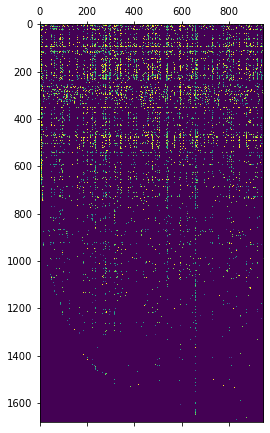

In [10]:
# Task: show matrix Y
# YOUR CODE ..................................

plt.matshow(Y)






### 1.6 Save variables

### Task 6
***
Finally, save the matrices Y and R so you can load them in another notebook.

In [11]:
# Task: save a matrix Y and R
# YOUR CODE ..................................

np.save('Y.npy',Y)
np.save('R.npy',R)





